In [1]:

# Clustering

import sys
sys.path.append('/Users/amcphers/Projects/Biclustering')

from inference import build_model,\
                      plot_hard_clustering,\
                      plot_cluster_means,\
                      display_map_axis_mapping,\
                      get_map_item,\
                      show_plots
from data_generator import generate_data
import numpy as np
import pandas as pd

snv_table2 = pd.read_csv('data.tsv', sep='\t')

data_table = (
    snv_table2
    .set_index(['event_id', 'origin_node', 'plot_id'])
    [['ref_counts', 'alt_counts', 'total_raw_e', 'tumour_content', 'ccf']].unstack())

node = {}
node['location_indicies'] = data_table.reset_index(level=1)['origin_node'].values
node['cluster_indicies'] = ((data_table['ccf'].groupby(level=1).mean() > 0.5) * 1).values
node['axis_dp_alpha'] = 1.0

ref_counts = data_table['ref_counts'].values

alt_counts = data_table['alt_counts'].values

total_raw_e = data_table['total_raw_e'].values

tumour_content = data_table['tumour_content'].values

model, trace = build_model(ref_counts, alt_counts, total_raw_e, tumour_content, 2, start=node)



/Users/amcpherson/Anaconda/lib/python2.7/site-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"
100%|██████████| 2/2 [00:09<00:00,  5.18s/it]


In [2]:

indicies = get_map_item(model, trace, 'location_indicies')


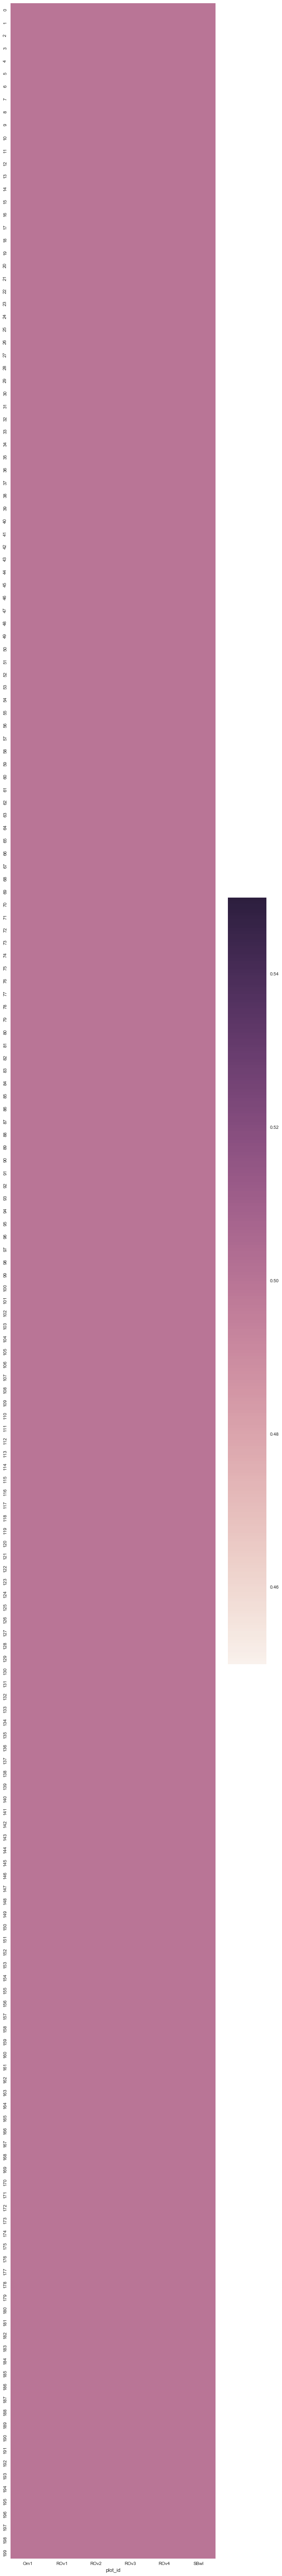

In [5]:

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn

cluster_locations = get_map_item(model, trace, 'cluster_locations')
cluster_locations = pd.DataFrame(cluster_locations, columns=data_table['ref_counts'].columns)

fig = plt.figure(figsize=(10, 100))
ax = plt.gca()
seaborn.heatmap(cluster_locations, ax=ax)


In [6]:

indices = trace['location_indicies'][-1]
indices_table = pd.DataFrame({'cluster_id': indicies}, index=data_table.index).reset_index()
snv_table3 = snv_table2.merge(indices_table)


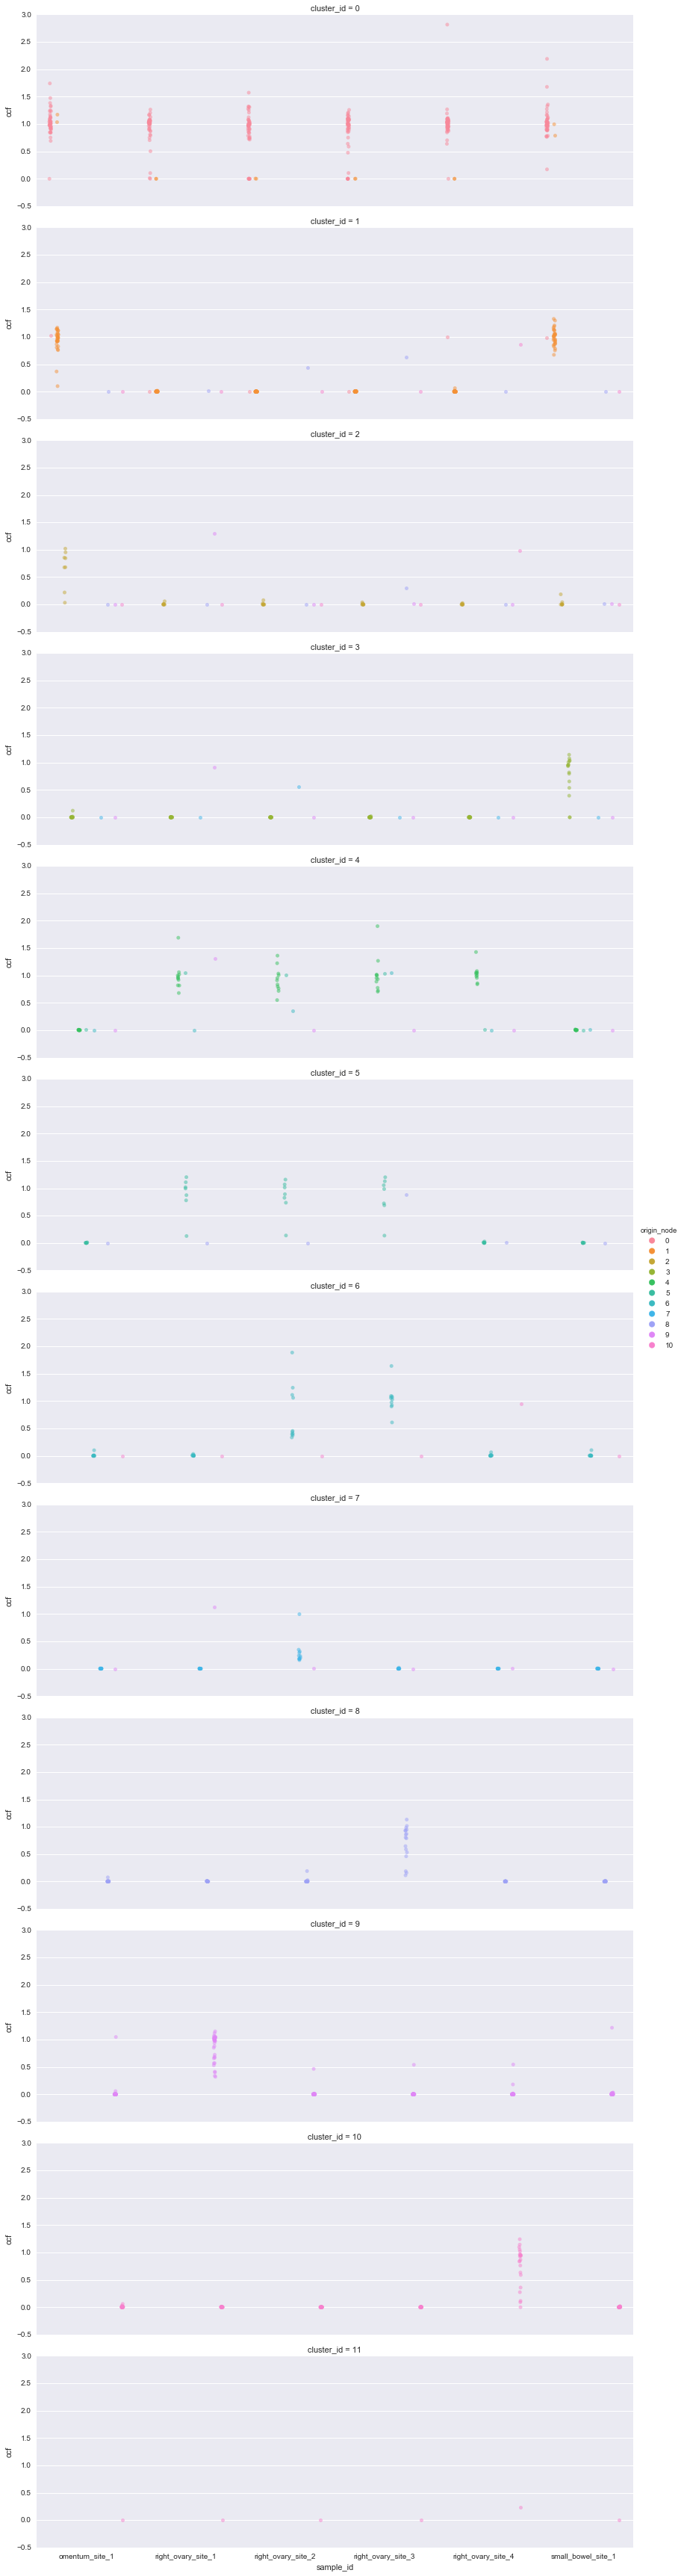

In [7]:

indices_table.groupby('cluster_id').size()

seaborn.factorplot(
    hue='origin_node', y='ccf', x='sample_id', row='cluster_id',
    data=snv_table3, kind='strip', jitter=True, aspect=3, split=True, alpha=0.5)
